<a href="https://colab.research.google.com/github/oskarmalmwiklund/affective-computing-project/blob/main/multiple_images_facial_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas matplotlib py-feat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.4/653.4 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


In [3]:
import pandas as pd

In [4]:
from glob import glob

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from feat import Detector
from feat.plotting import plot_face
from glob import glob

detector = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    facepose_model="img2pose",
)


100%|██████████| 176/176 [00:00<00:00, 164080.35it/s]
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 169MB/s]


In [ ]:
# Directory containing your images
image_dir = "images/"

In [ ]:
# Get all image paths
image_paths = glob(os.path.join(image_dir, "*.jpeg"))  # adjust the extension as needed

In [ ]:
# Run the detector on all images and store the results
predictions = []
for image_path in image_paths:
    prediction = detector.detect_image(image_path)
    predictions.append(prediction)

100%|██████████| 1/1 [00:04<00:00,  4.63s/it]


In [ ]:
# Concatenate all predictions
all_predictions = pd.concat(predictions)

In [ ]:
# Save the concatenated predictions to a CSV file
all_predictions.to_csv("all_predictions.csv")

In [ ]:
# Calculate the mean of the facial expressions and action units
mean_values = all_predictions.mean(numeric_only=True)

<ipython-input-29-e1f9bf4f47ac>:2: FutureWarning: The default value of numeric_only in Fex.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = all_predictions.mean()


In [ ]:
# Calculate the mean of the facial expressions and action units
mean_values = all_predictions.mean()

# Convert the Series to a DataFrame and transpose it
mean_values_df = mean_values.to_frame().T

# Save the mean values to a CSV file
mean_values_df.to_csv("mean_values.csv", index=False)

<ipython-input-32-83321a643ca3>:2: FutureWarning: The default value of numeric_only in Fex.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = all_predictions.mean()


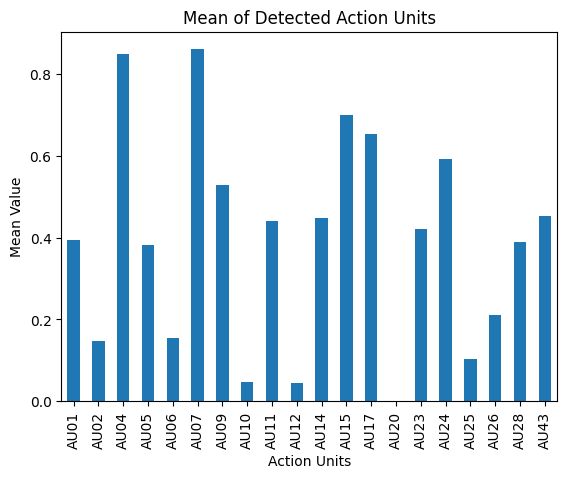

In [ ]:
# Filter for action units only
au_columns = [col for col in all_predictions.columns if 'AU' in col]
mean_au_values = mean_values[au_columns]

# Plot the mean of detected action units as a bar graph
mean_au_values.plot(kind='bar')
plt.title("Mean of Detected Action Units")
plt.xlabel("Action Units")
plt.ylabel("Mean Value")
plt.savefig("mean_au_values.png")

In [1]:
from feat.plotting import plot_face

plot_face(
    au=models['aus'][1].coef_.squeeze(), # the LDA coefs from the AUs pipeline model
    feature_range=(0, 1),
    muscles={"all": "heatmap"},
    title="Expression reconstructed from\nAU classifier weights",
    title_kwargs={'wrap':False}
);
sns.despine(left=True,bottom=True);

plt.savefig('./fig_maker/weights.pdf', bbox_inches='tight');

ModuleNotFoundError: ignored